In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

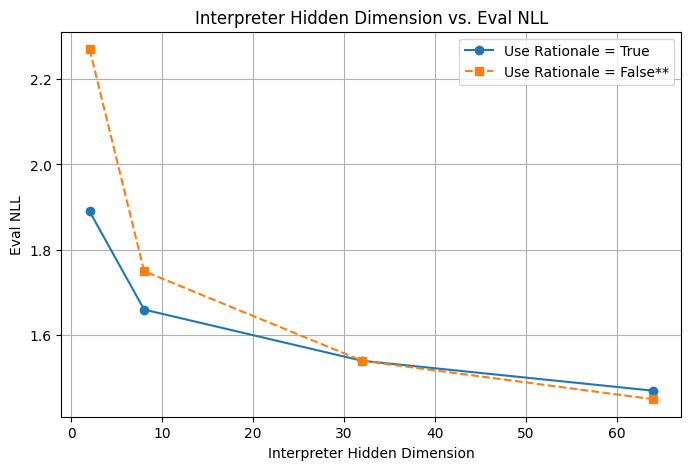

In [3]:

# Data extracted from the user's input
x_values = [2, 2, 8, 8, 32, 32, 64, 64]  # Sixth column values
y_true = [1.89, 1.66, 1.54, 1.47]  # Final numerical values where "True" is selected
y_false = [2.27, 1.75, 1.54, 1.45]  # Final numerical values where "False**" is selected

# Corresponding x-values for True and False
x_true = [2, 8, 32, 64]
x_false = [2, 8, 32, 64]

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(x_true, y_true, marker='o', linestyle='-', label="Use Rationale = True")
plt.plot(x_false, y_false, marker='s', linestyle='--', label="Use Rationale = False**")

# Labels and title
plt.xlabel("Interpreter Hidden Dimension")
plt.ylabel("Eval NLL")
plt.title("Interpreter Hidden Dimension vs. Eval NLL")
plt.legend()
plt.grid(True)

# Show plot
plt.show()


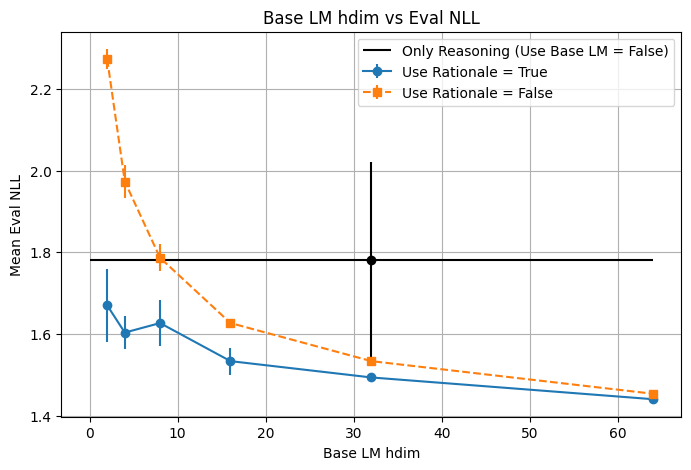

In [10]:
# Base lm hdim values
x_values = [2, 4, 8, 16, 32, 64]

# Eval NLL values (mean and range) for "True" in use_r
y_true_means = [np.mean([1.61, 1.68, 1.72]), 
                np.mean([1.58, 1.60, 1.63]), 
                np.mean([1.66, 1.59, 1.63]), 
                np.mean([1.54, 1.51, 1.55]), 
                np.mean([1.49, 1.50, 1.49]), 
                np.mean([1.44, 1.44, 1.44])]

y_true_errors = [np.std([1.61, 1.68, 1.72])*1.96,
                 np.std([1.58, 1.60, 1.63])*1.96,
                 np.std([1.66, 1.59, 1.63])*1.96,
                 np.std([1.54, 1.51, 1.55])*1.96,
                 np.std([1.49, 1.50, 1.49])*1.96,
                 np.std([1.44, 1.44, 1.44])*1.96]

# Eval NLL values (mean and range) for "False" in use_r
y_false_means = [np.mean([2.27, 2.29, 2.26]), 
                 np.mean([1.97, 2.00, 1.95]), 
                 np.mean([1.81, 1.77, 1.78]), 
                 np.mean([1.63, 1.63, 1.62]), 
                 np.mean([1.53, 1.54, 1.53]), 
                 np.mean([1.45, 1.45, 1.46])]

y_false_errors = [np.std([2.27, 2.29, 2.26])*1.96,
                  np.std([1.97, 2.00, 1.95])*1.96,
                  np.std([1.81, 1.77, 1.78])*1.96,
                  np.std([1.63, 1.63, 1.62])*1.96,
                  np.std([1.53, 1.54, 1.53])*1.96,
                  np.std([1.45, 1.45, 1.46])*1.96]

# Plot
plt.figure(figsize=(8, 5))
plt.errorbar(x_values, y_true_means, yerr=y_true_errors, marker='o', linestyle='-', label="Use Rationale = True")
plt.errorbar(x_values, y_false_means, yerr=y_false_errors, marker='s', linestyle='--', label="Use Rationale = False")
plt.hlines([np.mean([1.95, 1.73, 1.66])], xmin=0, xmax=64, colors=["black"], label="Only Reasoning (Use Base LM = False)")
plt.errorbar(x=32, y=np.mean([1.95, 1.73, 1.66]), yerr=np.std([1.95, 1.73, 1.66]) * 1.96, color='black', fmt='o')
# Labels and title
plt.xlabel("Base LM hdim")
plt.ylabel("Mean Eval NLL")
plt.title("Base LM hdim vs Eval NLL")
plt.legend()
plt.grid(True)

# Show plot
plt.show()


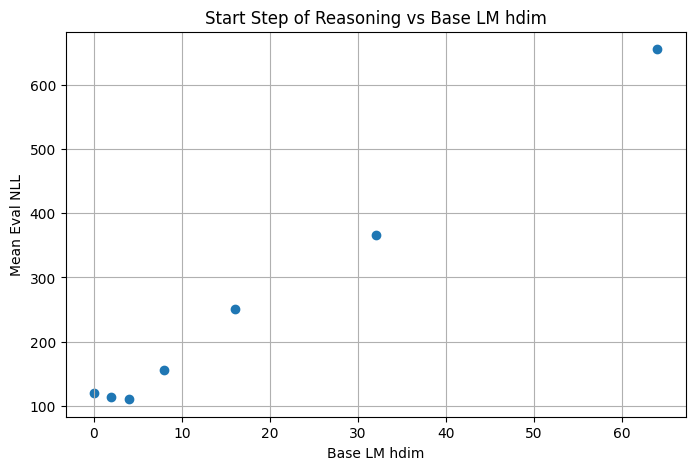

In [18]:
base_lm_hdim = [0, 2, 4, 8, 16, 32, 64]
reasoning_started = [119, 114, 110, 155, 251, 366, 656]

plt.figure(figsize=(8, 5))
plt.scatter(base_lm_hdim, reasoning_started)

plt.xlabel("Base LM hdim")
plt.ylabel("Mean Eval NLL")
plt.title("Start Step of Reasoning vs Base LM hdim")
# plt.legend()
plt.grid(True)
plt.show()

In [1]:
df = pd.read_csv("/nethome/jbjorner3/dev/hallucination-fun/quiet_star_replicate/scratch/wandb_export_2025-02-03T20_20_01.440-05_00.csv")
df = df[df["model_hidden_dim"] != 100]
df.columns

Index(['Name', 'State', 'Notes', 'User', 'Tags', 'Created', 'Runtime', 'Sweep',
       'data_loader_batch_size', 'data_loader_num_workers', 'device', 'epochs',
       'info', 'interpreter_hidden_dim', 'model_hidden_dim', 'model_type',
       'node_name', 'output_dir', 'reasoner_hidden_dim', 'run_type', 'seq_len',
       'training_type', 'use_base_lm', 'use_reasoner', 'max_reasoning_len',
       'policy_loss_beta', 'trice_samples', 'experiment_logger',
       'n_tokens_ahead', 'base_lm_hidden_dim',
       'reasoner_interpreter_vocab_size', 'seed', 'auto_find_grad_acc',
       'debug_cfg', 'grad_acc', 'epoch', 'eval_loss', 'grad_norm', 'loss',
       'model_param_norm', 'nll_loss', 'quiet_star_policy_loss',
       'reasoning_entropy_max', 'reasoning_entropy_mean',
       'reasoning_entropy_min', 'step', 'sentence_reasoning_entropy_max',
       'sentence_reasoning_entropy_mean', 'sentence_reasoning_entropy_min'],
      dtype='object')

In [2]:
df.model_hidden_dim

0     1024
1       32
2       32
3       16
4        8
5        4
6        4
7        2
8        2
9      512
10     512
11     256
12     256
13     128
14     128
15      64
16      64
17      16
18       8
19     512
20     512
21     128
22     128
23      64
24      64
25      32
26      32
27      16
28      16
29       8
30       8
31       4
32       4
33       2
34       2
35    1024
Name: model_hidden_dim, dtype: int64

In [5]:
summary_df = df.groupby(["model_hidden_dim", "use_reasoner"]).aggregate({"nll_loss": ("mean", 'std'), "eval_loss": ('mean', 'std')})
summary_df

nll_loss           eval_loss          
                                   mean       std      mean       std
model_hidden_dim use_reasoner                                        
2                False         3.008070  0.018396  3.002512  0.020189
                 True          3.314054  0.004414  3.318630  0.000182
4                False         2.706575  0.085117  2.699896  0.091819
                 True          3.317022  0.014055  3.317222  0.000179
8                False         2.422708  0.036205  2.411140  0.021961
                 True          3.308453  0.011429  3.316045  0.000983
16               False         2.132929  0.006678  2.121622  0.005104
                 True          2.451995  0.064876  2.433707  0.060657
32               False         1.931178  0.048223  1.910427  0.046956
                 True          2.065715  0.064884  2.059891  0.054282
64               False         1.644049  0.056750  1.631196  0.000898
                 True          1.766038  0.088635  1.754168  0.043443
128              False         1.409572  0.024217  1.465908  0.002010
                 True          1.499667  0.034459  1.530833  0.011671
256              False         1.237484  0.006663  1.387767  0.003891
512              False         0.992667  0.014017  1.462614  0.002248
                 True          1.075115  0.004607  1.461828  0.001367
1024             False         0.513181       NaN  1.906242       NaN
                 True          0.706302       NaN  1.753591       NaN

In [26]:
summary_df.index

(np.int64(2), np.True_)

In [43]:
summary_df.index.levels[0]

Index([2, 4, 8, 16, 32, 64, 128, 256, 512, 1024], dtype='int64', name='model_hidden_dim')

In [49]:
summary_df.iloc[summary_df.index.isin([False], level=1)]['eval_loss', 'std'].tolist()

[0.020188803035882212,
 0.09181901711374278,
 0.021961318896375464,
 0.0051036881815627105,
 0.0469561114866863,
 0.0008983482206963281,
 0.002009763035380398,
 0.0038907942076954823,
 0.0022479021169392256,
 nan]

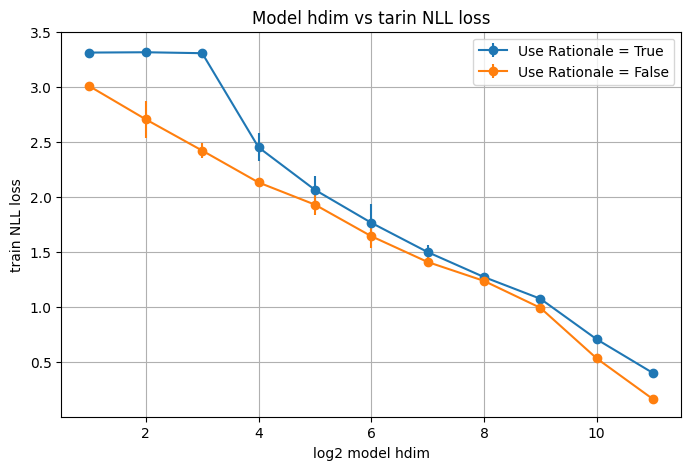

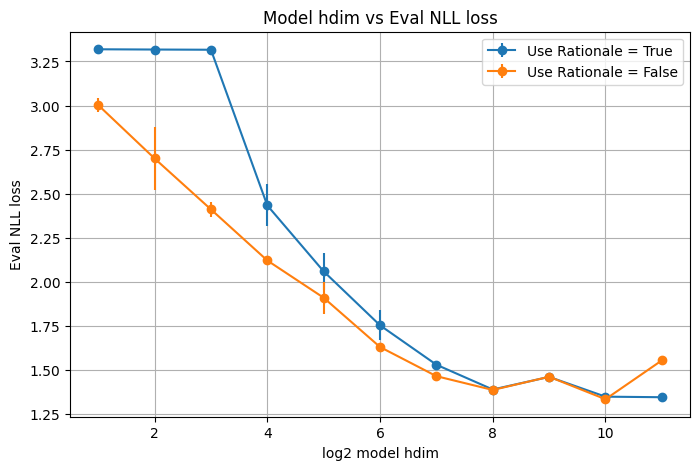

In [11]:
import matplotlib.pyplot as plt
import numpy as np
x_values_mean_nll_loss = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048] # ['model_hidden_dim']
mean_nll_loss = np.array([3.3140543619791667, 3.317022196451823, 3.3084527587890626, 2.451995239257813, 2.065714823404948, 1.76603759765625, 1.4996669006347658, 1.272705, 1.0751153564453124, 0.7063019752502442, 0.39907])
std_err_nll_loss = np.array([0.004413662932699067, 0.014054811849280027, 0.011428624859827034, 0.06487595382841935, 0.06488357847429409, 0.0886346380961926, 0.034458867724088856, 0.005525, 0.004607300165665795, np.nan, np.nan]) * 1.96

x_values_mean_nll_loss_no_reason = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]
mean_nll_loss_no_reason = np.array([3.0080696614583333, 2.706575012207031, 2.4227083333333335, 2.132928771972656, 1.9311780865987145, 1.6440488688151043, 1.4095716349283856, 1.2374836222330727, 0.9926668802897135, 0.53246, 0.1615])
std_err_nll_loss_no_reason = np.array([0.01839553713182061, 0.08511737456811053, 0.0362052712824818, 0.006678470479944419, 0.048223016923382586, 0.05675009538348527, 0.02421745777143612, 0.0066626457432235235, 0.014017335995500316, np.nan, np.nan]) * 1.96


plt.figure(figsize=(8, 5))
plt.errorbar(np.log2(x_values_mean_nll_loss), mean_nll_loss, yerr=std_err_nll_loss, marker='o', linestyle='-', label="Use Rationale = True")
plt.errorbar(np.log2(x_values_mean_nll_loss_no_reason), mean_nll_loss_no_reason, yerr=std_err_nll_loss_no_reason, marker='o', linestyle='-', label="Use Rationale = False")
# plt.errorbar(x_values, mean_nll_loss_rationale_false, yerr=std_err_nll_loss_rationale_false, marker='s', linestyle='--', label="Use Rationale = False")
# plt.hlines([np.mean([1.95, 1.73, 1.66])], xmin=0, xmax=64, colors=["black"], label="Only Reasoning (Use Base LM = False)")
# plt.errorbar(x=32, y=np.mean([1.95, 1.73, 1.66]), yerr=np.std([1.95, 1.73, 1.66]) * 1.96, color='black', fmt='o')
# Labels and title

plt.xlabel("log2 model hdim")
plt.ylabel("train NLL loss")
plt.title("Model hdim vs tarin NLL loss")
plt.legend()
plt.grid(True)

plt.figure(figsize=(8, 5))

x_values_mean_eval_loss = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048] # ['model_hidden_dim']
mean_eval_loss = np.array([3.318629863752153, 3.3172217805952213, 3.316044944298938, 2.433706990886912, 2.0598906945142077, 1.7541676991021455, 1.530832564379126, 1.39035, 1.461827730338691, 1.3498, 1.34663])
std_err_eval_loss = np.array([0.00018194896119117814, 0.0001785795359843499, 0.0009834757575499407, 0.06065678898379384, 0.05428183649168612, 0.04344328750665044, 0.011670995212707659, 0.0013, 0.0013673920296932178, np.nan, np.nan]) * 1.96

x_values_mean_eval_loss_no_reason = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]
mean_eval_loss_no_reason = np.array([3.0025120416547075, 2.699895812778057, 2.4111402404294635, 2.121621553440729, 1.9104271592009903, 1.631195663995228, 1.4659076257085966, 1.3877667187275762, 1.4626137594404778, 1.3353, 1.5554])
std_err_eval_loss_no_reason = np.array([0.020188803035882212, 0.09181901711374278, 0.021961318896375464, 0.0051036881815627105, 0.0469561114866863, 0.0008983482206963281, 0.002009763035380398, 0.0038907942076954823, 0.0022479021169392256, np.nan, np.nan]) * 1.96

plt.errorbar(np.log2(x_values_mean_eval_loss), mean_eval_loss, yerr=std_err_eval_loss, marker='o', linestyle='-', label="Use Rationale = True")
plt.errorbar(np.log2(x_values_mean_eval_loss_no_reason), mean_eval_loss_no_reason, yerr=std_err_eval_loss_no_reason, marker='o', linestyle='-', label="Use Rationale = False")

plt.xlabel("log2 model hdim")
plt.ylabel("Eval NLL loss")
plt.title("Model hdim vs Eval NLL loss")
plt.legend()
plt.grid(True)

In [33]:
df = pd.read_csv("/nethome/jbjorner3/dev/hallucination-fun/quiet_star_replicate/scratch/wandb_export_2025-02-04T10_34_30.855-05_00.csv")
df.columns
summary_df = df.groupby(["base_lm_hidden_dim", "use_reasoner"]).aggregate({"eval_loss": ["mean", "std"]})
summary_df

eval_loss          
                                     mean       std
base_lm_hidden_dim use_reasoner                    
32                 False         1.869651  0.005652
                   True          1.863618  0.007395
64                 False         1.647283  0.003761
                   True          1.645043  0.004788
100                False         1.523299  0.011812
                   True          1.531437  0.000827

In [34]:
summary_df[summary_df.index.isin([True], level=1)]['eval_loss', 'mean'].tolist()

[1.863617655786572, 1.6450430763849024, 1.5314373800319316]

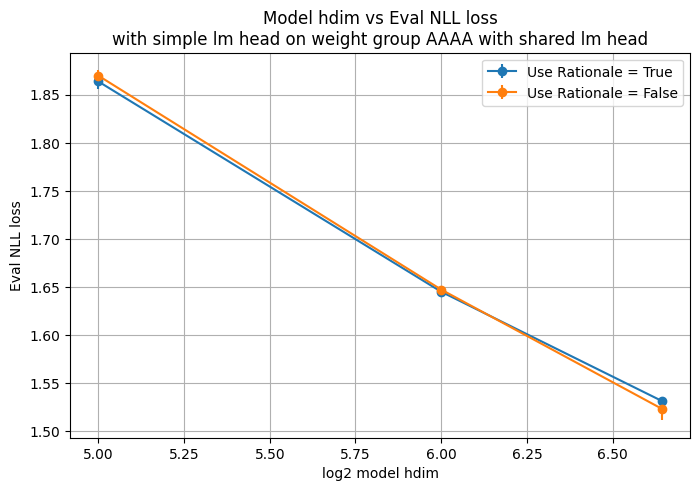

In [37]:
x_values = [32, 64, 100]
mean_eval_loss = summary_df[summary_df.index.isin([True], level=1)]['eval_loss', 'mean'].tolist()
std_err_eval_loss =summary_df[summary_df.index.isin([True], level=1)]['eval_loss', 'std'].tolist()

mean_eval_loss_no_reason = summary_df[summary_df.index.isin([False], level=1)]['eval_loss', 'mean'].tolist()
std_err_eval_loss_no_reason =summary_df[summary_df.index.isin([False], level=1)]['eval_loss', 'std'].tolist()

plt.figure(figsize=(8, 5))
plt.errorbar(np.log2(x_values), mean_eval_loss, yerr=std_err_eval_loss, marker='o', linestyle='-', label="Use Rationale = True")
plt.errorbar(np.log2(x_values), mean_eval_loss_no_reason, yerr=std_err_eval_loss_no_reason, marker='o', linestyle='-', label="Use Rationale = False")
# plt.errorbar(x_values, mean_nll_loss_rationale_false, yerr=std_err_nll_loss_rationale_false, marker='s', linestyle='--', label="Use Rationale = False")
# plt.hlines([np.mean([1.95, 1.73, 1.66])], xmin=0, xmax=64, colors=["black"], label="Only Reasoning (Use Base LM = False)")
# plt.errorbar(x=32, y=np.mean([1.95, 1.73, 1.66]), yerr=np.std([1.95, 1.73, 1.66]) * 1.96, color='black', fmt='o')
# Labels and title

plt.xlabel("log2 model hdim")
plt.ylabel("Eval NLL loss")
plt.title("Model hdim vs Eval NLL loss\nwith simple lm head on weight group AAAA with shared lm head")
plt.legend()
plt.grid(True)